# Objectives

After completing this lab you will be able to:

- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*  [`Folium`](https://python-visualization.github.io/folium/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.


### Installing Required Libraries




In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# %pip install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 seaborn folium
# Note: If your environment doesn't support "%pip install", use "!mamba install"

In [1]:
%pip install seaborn
%pip install folium

### Importing Required Libraries




In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

<ipython-input-2-107089beb3f3>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


---


# Scenario

In this assignment we will be creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, our aim is to gain insights into how recessions impacted automobile sales for your company.


---


# Importing Data


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [6]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


---


# Creating Visualizations for Data Analysis


### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


Text(0, 0.5, 'Automobile Sales')

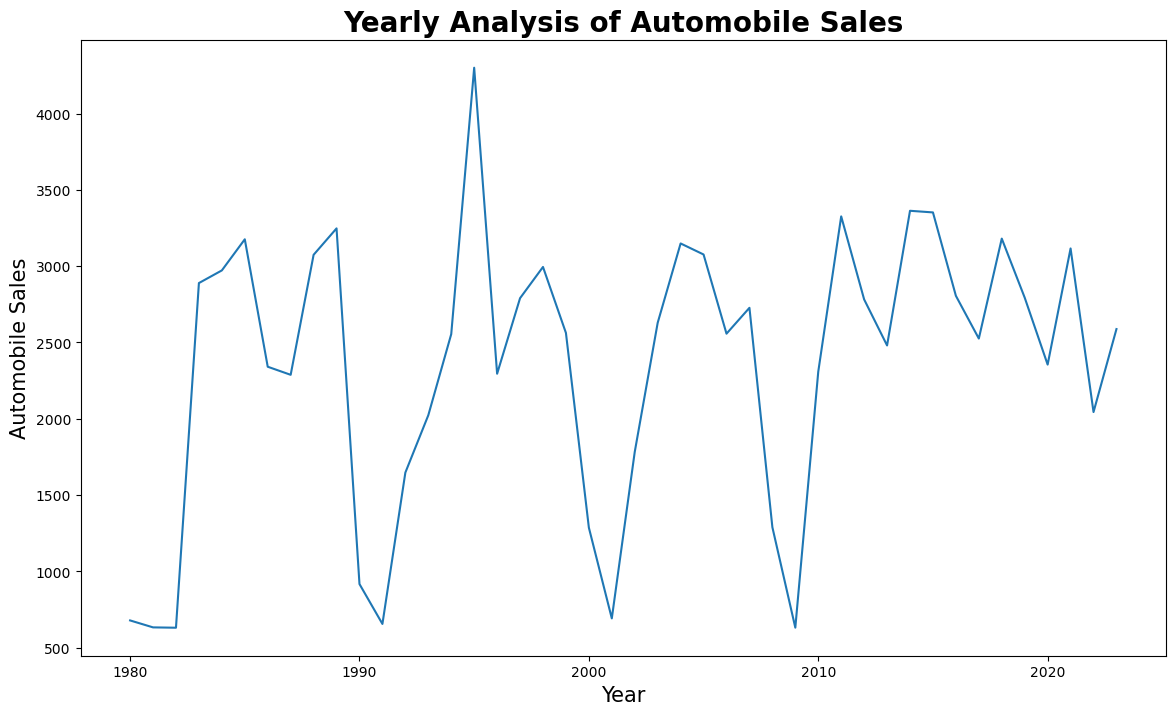

In [7]:
df1 = df.groupby(['Year'])['Automobile_Sales'].mean()
df1.plot(kind='line', figsize=(14,8))
plt.title("Yearly Analysis of Automobile Sales",fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Automobile Sales', fontsize=15)

In [28]:
df1.tail()

Year
2019    2793.733333
2020    2355.166667
2021    3116.041667
2022    2044.141667
2023    2587.933333
Name: Automobile_Sales, dtype: float64

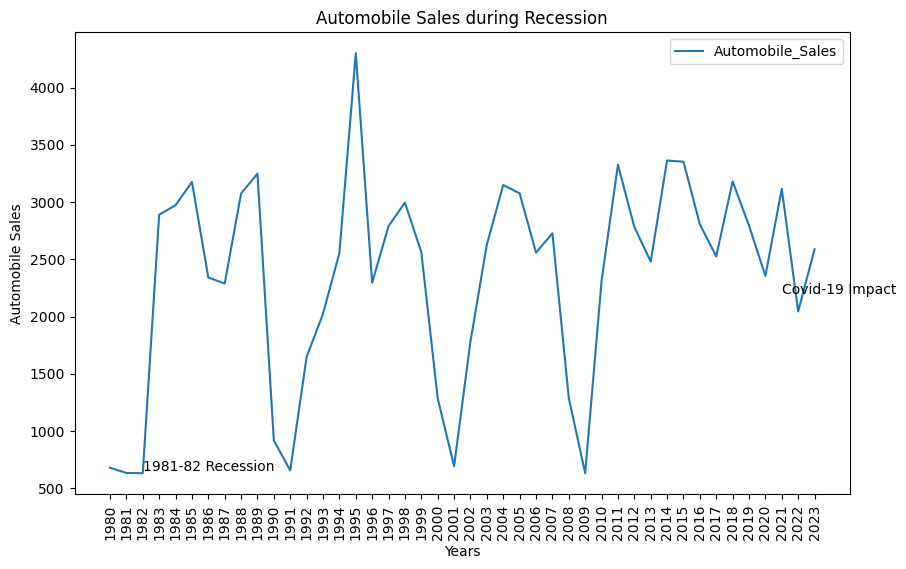

In [30]:

    plt.figure(figsize=(10, 6))
    df1.plot(kind = 'line')
    plt.xticks(list(range(1980,2024)), rotation = 90)
    plt.xlabel('Years')
    plt.ylabel('Automobile Sales')
    plt.title('Automobile Sales during Recession')
    plt.text(1982, 650, '1981-82 Recession')
    plt.text(2021, 2200, 'Covid-19 Impact')
    plt.legend()
    plt.show()

---



####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


In [58]:
df_Mline.mean()

Vehicle_Type
Executivecar       564.000000
Mediumfamilycar    670.561369
Smallfamiliycar    662.192679
Sports             170.333333
Supperminicar      671.095500
Name: Automobile_Sales, dtype: float64

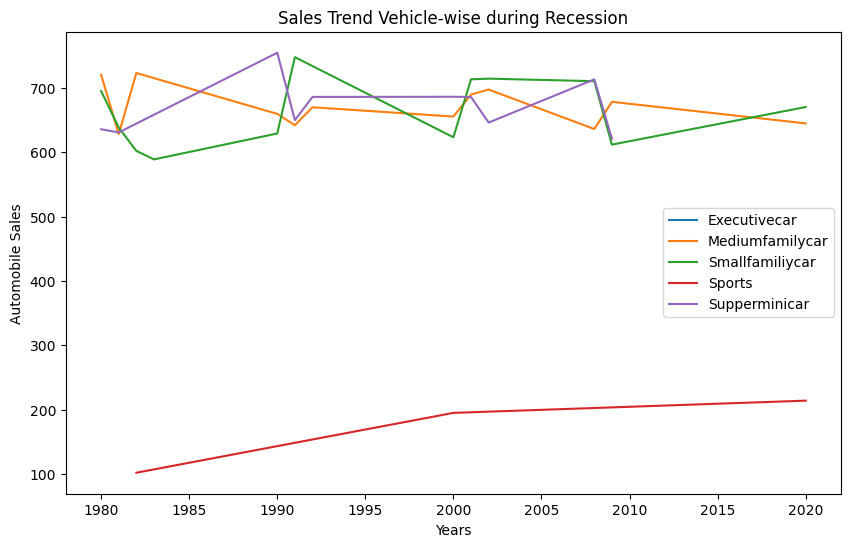

In [70]:
    plt.figure(figsize=(10,6))
    df_rec = df[df['Recession']==1]
    df_Mline = df_rec.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
    df_Mline.set_index('Year', inplace=True)
    df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
    df_Mline.plot(kind='line')
    plt.xlabel('Years')
    plt.ylabel('Automobile Sales')
    plt.title('Sales Trend Vehicle-wise during Recession')
    plt.legend()
    plt.show()


#### From the above plot, we have gained following insights on the sales of various vehicle types?<br>



* No sale of Executive car during recession period becuase of its high cost
* Sales for 'Sports type vehicles' declined because of the high cost of the vehicle
* Sales of the superminicar and smallfamilycar increased

----


### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


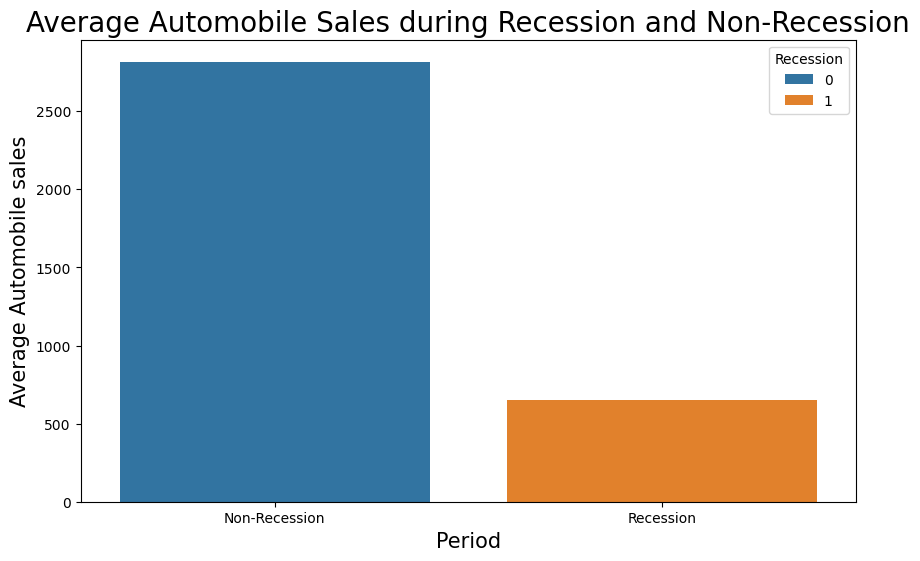

In [8]:

    df2 = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
    plt.figure(figsize=(10,6))
    sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=df2)
    plt.xlabel('Period', fontsize=15)
    plt.ylabel('Average Automobile sales', fontsize=15)
    plt.title('Average Automobile Sales during Recession and Non-Recession', fontsize=20)
    plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
    plt.show()

### Now we want to compare the sales of different vehicle types during a recession and a non-recession period



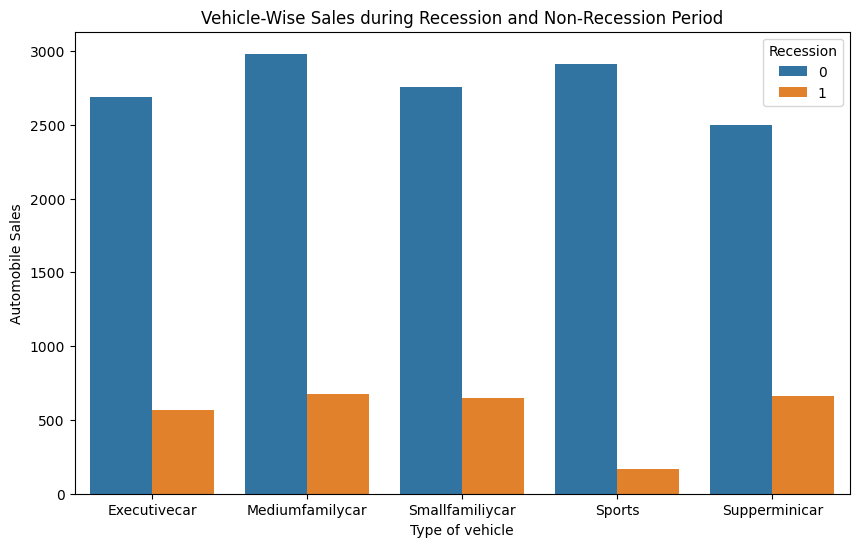

In [13]:
    dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

    # Calculate the total sales volume by vehicle type during recessions
    # sales_by_vehicle_type = df_rec.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
    # sales_by_vehicle_type
    # dd.head()

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=dd)
    # plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
    plt.xlabel('Type of vehicle')
    plt.ylabel('Automobile Sales')
    plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

    plt.show()

### From the above chart we conclude that <br> 


Automobile sales declined during recession, and most affected was sales of Sports car 

---


### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, we want to find more insights from the data to understand the reason. <br> We will plot a two line charts using subplotting to find the answer of this -
#### How did the GDP vary over time during recession and non-recession periods? 



Text(0, 0.5, 'GDP')

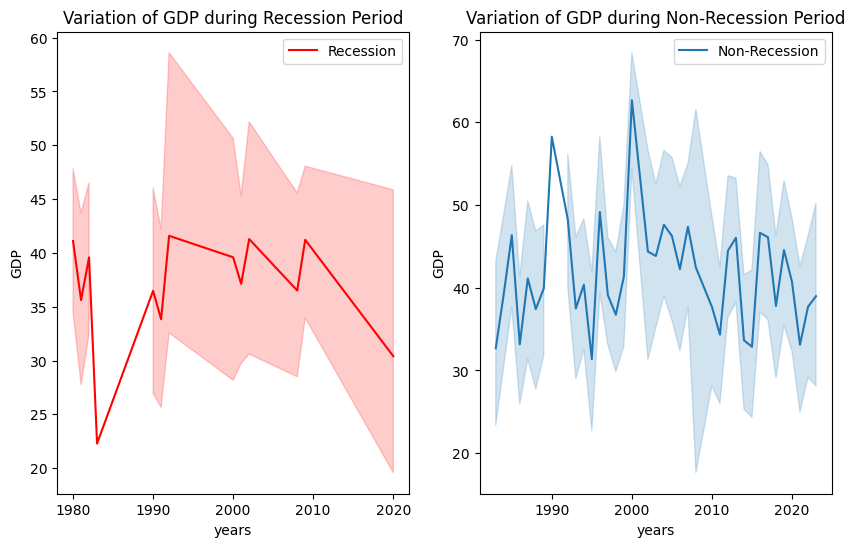

In [21]:
df3 = df[df['Recession']==1]
df4 = df[df['Recession']==0]
fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

sns.lineplot(x='Year',y='GDP', data=df3, label='Recession',color='red', ax=ax0)
ax0.set_title('Variation of GDP during Recession Period')
ax0.set_xlabel('years')
ax0.set_ylabel('GDP')

sns.lineplot(x='Year',y='GDP', data=df4, label='Non-Recession', ax=ax1)
ax1.set_title('Variation of GDP during Non-Recession Period')
ax1.set_xlabel('years')
ax1.set_ylabel('GDP')

### Inference
From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company



---


### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? We will Check it for non-recession years to understand the trend

##### We will develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>



Text(0, 0.5, 'Automobile Sales')

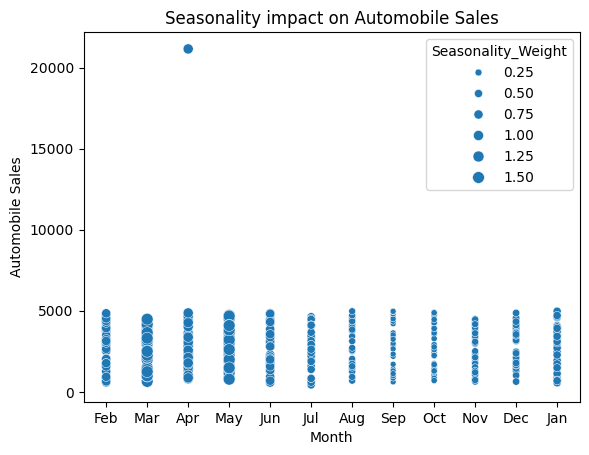

In [33]:
#df4.plot(kind='scatter', x='Month', y='Automobile_Sales', s='Seasonality_Weight')
sns.scatterplot(x='Month', y='Automobile_Sales', size='Seasonality_Weight', data=df4)
plt.title('Seasonality impact on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Automobile Sales')

### Inference
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April


---


 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data,we will develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 



Text(0, 0.5, 'Sales Volume')

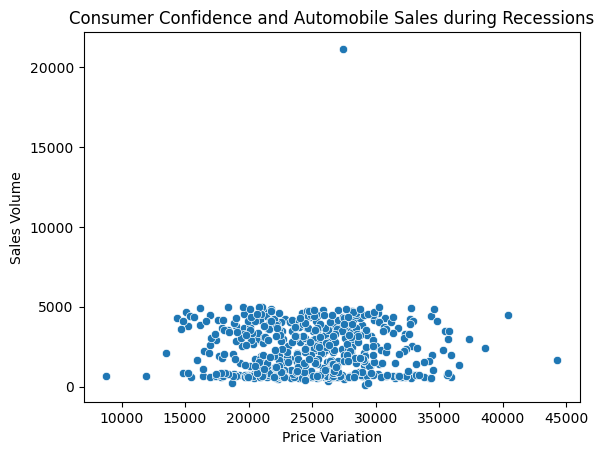

In [34]:
sns.scatterplot(x='Price', y='Automobile_Sales', data=df)
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.xlabel('Price Variation')
plt.ylabel('Sales Volume')


 ### How does the average vehicle price relate to the sales volume during recessions?


Text(0, 0.5, 'Sales Volume')

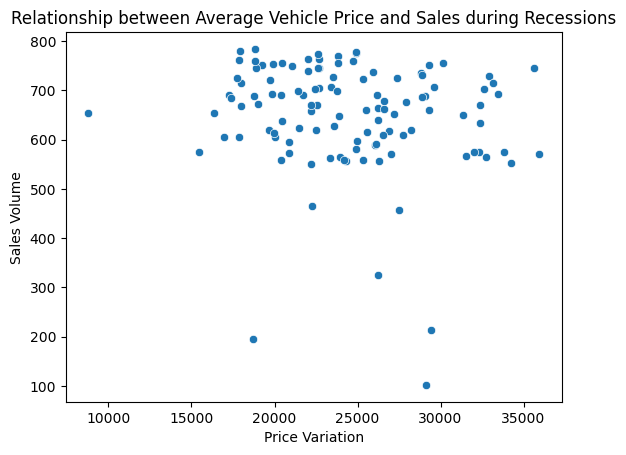

In [35]:
sns.scatterplot(x='Price', y='Automobile_Sales', data=df3)
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.xlabel('Price Variation')
plt.ylabel('Sales Volume')

### Inference
There is not much relation!

----


 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


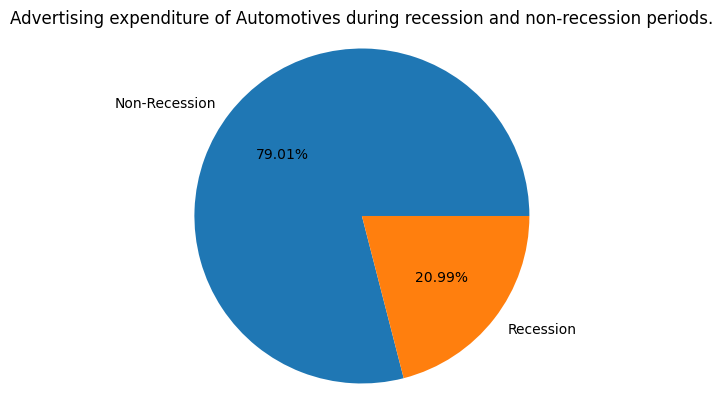

In [47]:
df5 = df.groupby('Recession')['Advertising_Expenditure'].sum()
labels = ['Non-Recession', 'Recession']
plt.pie(df5, labels=labels, autopct='%1.2f%%')
plt.title('Advertising expenditure of Automotives during recession and non-recession periods.')

plt.axis('equal')
plt.show()

## Inference
It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!

---


### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 


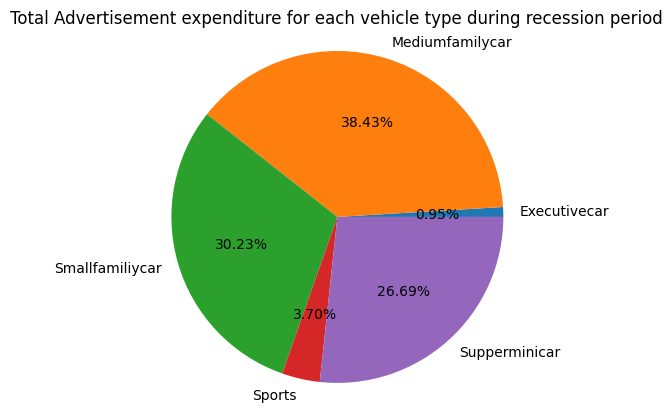

In [49]:
df6 = df3.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
plt.pie(df6, labels=df6.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('Total Advertisement expenditure for each vehicle type during recession period')
plt.show()

### Inference
During recession the advertisements were mostly focued on low price range vehicle. A wise decision!


----


 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### We will create a lineplot 

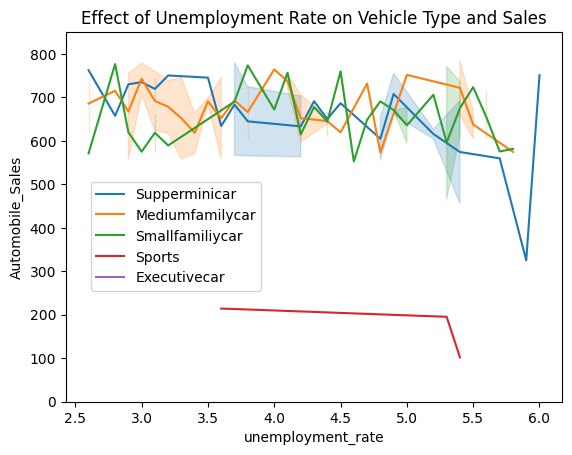

In [72]:

sns.lineplot(x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', data=df3)
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.ylim(0,850)
plt.legend(loc=(0.05,0.3))

## Inference
During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar

---


### TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period


In [73]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

#### We found that the datset also contains the location/city for company offices. Now we want to show the recession impact on various offices/city sales by developing a choropleth


In [74]:
df8 = df3.groupby('City')['Automobile_Sales'].sum().reset_index()
df8.head()

,City,Automobile_Sales
0,California,18982.6
1,Georgia,17470.5
2,Illinois,16874.7
3,New York,19954.6


In [82]:
from folium import Choropleth
sales_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
sales_geo = filename
Choropleth(geo_data=sales_geo, data=df8, columns=['City', 'Automobile_Sales'], key_on='feature.properties.name', fill_color='YlOrRd', legend_name='Automobile_Sales during Recession').add_to(sales_map)
sales_map